# Présentation graphique des données de contacts Hi-C normalisés

In [1]:
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py
import math

In [2]:
import cooler

In [3]:
# The following directive activates inline plotting
%matplotlib inline

In [4]:
filepath = "/home/bureau/projects/def-bureau/distiller/results_iPSC/coolers_library_group/Neuron_libraries.hg38.mapq_30.2048.cool"

In [5]:
c = cooler.Cooler(filepath)

Vecteur des chromosomes

In [6]:
chr_seq = []
for chr in range(1,23):
    chr_seq.append("chr" + str(chr))
chr_seq

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22']

In [7]:
import scipy.sparse as sparse

AttributeError: 'Line2D' object has no attribute 'get_array'

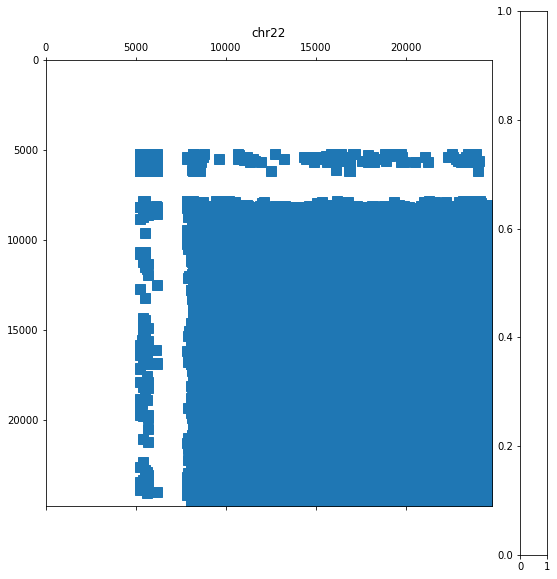

In [13]:
#for chr in chr_seq:
chr = chr_seq[21]
#tmp = c.matrix(balance=True, sparse=True).fetch(chr)
#arr= tmp.toarray()
#arr_sp= sparse.csr_matrix(arr)
#arr_sp
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.title(chr)
#im = ax.matshow(np.log10(arr), cmap='YlOrRd')
im = ax.spy(arr_sp)
fig.colorbar(im)

In [2]:
%whos

Variable   Type      Data/Info
------------------------------
h5py       module    <module 'h5py' from '/lus<...>ckages/h5py/__init__.py'>
math       module    <module 'math' from '/cvm<...>-38-x86_64-linux-gnu.so'>
np         module    <module 'numpy' from '/lu<...>kages/numpy/__init__.py'>
op         module    <module 'posixpath' from <...>/python3.8/posixpath.py'>
pandas     module    <module 'pandas' from '/c<...>ages/pandas/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
